# Bitcoin Analysis

In [2]:
#import the required libraries and dependencies

import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## Import data sets and prepare them for analysis

In [6]:
#import S&P500 data as a panda dataframe and make the index the date and convert to date time format
sp500_df = pd.read_csv(Path("S&P 500 Historical Data.csv"), index_col='Date', parse_dates=True, infer_datetime_format=True)

display(sp500_df.head())

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-06,"3,845.08","3,831.98","3,870.91","3,809.37",-,0.36%
2022-07-05,"3,831.39","3,792.61","3,832.19","3,742.06",-,0.16%
2022-07-01,"3,825.33","3,781.00","3,829.82","3,752.10",-,1.06%
2022-06-30,"3,785.38","3,785.99","3,818.99","3,738.67",-,-0.88%
2022-06-29,"3,818.83","3,825.09","3,836.50","3,799.02",-,-0.07%


In [7]:
#use pandas read csv function to import csv file
#replace all the commons with nothing
bitcoin_df = pd.read_csv(Path("Bitcoin Historical Data - Investing.com India.csv"), index_col='Date', parse_dates=True, infer_datetime_format=True)


bitcoin_df.replace(',','', regex=True, inplace=True)

display(bitcoin_df.head())
display(bitcoin_df.dtypes)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82K,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24K,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43K,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79K,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27K,0.35%


Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [8]:
#convert all values to str so that we can further clean
bitcoin_df.astype('str')
display(bitcoin_df.dtypes)


Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [9]:
#cleaning the vol collum
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('K','')
bitcoin_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,0.35%


In [10]:
#cleaning the vol column more
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('M','')
bitcoin_df.head()
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('B','')
bitcoin_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,-1.24%
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,1.78%
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,-0.08%
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,4.69%
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,0.35%


In [11]:
#dropping the change % column bc it is a nuisance
bitcoin_df = bitcoin_df.drop(bitcoin_df.columns[5],axis=1)
bitcoin_df.head()


,Price,Open,High,Low,Vol.
Date,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27


In [12]:
# more cleaning of the vol column
bitcoin_df['Vol.'] = bitcoin_df['Vol.'].str.replace('-','0')


In [13]:
#converting all the values to float so we can perform calculations boi
bitcoin_df = bitcoin_df.apply(pd.to_numeric)
display(bitcoin_df.dtypes)


Price    float64
Open     float64
High     float64
Low      float64
Vol.     float64
dtype: object

In [14]:
#taking the average of price, open, high, low to create a new column that is the avg daily price
bitcoin_df['avg daily price'] = bitcoin_df.iloc[:, [0,1,2,3]].mean(axis=1)
display(bitcoin_df.head())
display(bitcoin_df.tail())

                        


,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2022-07-07,20306.8,20557.9,20584.2,20282.7,91.82,20432.900
2022-07-06,20561.1,20180.4,20654.9,19785.3,105.24,20295.425
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525


,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2010-07-22,0.1,0.1,0.1,0.1,2.16,0.100
2010-07-21,0.1,0.1,0.1,0.1,0.58,0.100
2010-07-20,0.1,0.1,0.1,0.1,0.26,0.100
2010-07-19,0.1,0.1,0.1,0.1,0.57,0.100
2010-07-18,0.1,0.0,0.1,0.1,0.08,0.075


In [15]:
# remove all commas in the S&P 500 dataset
sp500_df.replace(',','', regex=True, inplace=True)
sp500_df.head()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37,-,0.36%
2022-07-05,3831.39,3792.61,3832.19,3742.06,-,0.16%
2022-07-01,3825.33,3781.00,3829.82,3752.10,-,1.06%
2022-06-30,3785.38,3785.99,3818.99,3738.67,-,-0.88%
2022-06-29,3818.83,3825.09,3836.50,3799.02,-,-0.07%


In [16]:
#drop volum and change % columns bc they are both a nuisnance
sp500_df.drop(columns=['Vol.','Change %'], inplace=True)
sp500_df.head()

,Price,Open,High,Low
Date,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37
2022-07-05,3831.39,3792.61,3832.19,3742.06
2022-07-01,3825.33,3781.00,3829.82,3752.10
2022-06-30,3785.38,3785.99,3818.99,3738.67
2022-06-29,3818.83,3825.09,3836.50,3799.02


In [17]:
#convert datatype to float64 so we can perform calculations
sp500_df = sp500_df.apply(pd.to_numeric)
display(sp500_df.dtypes)

Price    float64
Open     float64
High     float64
Low      float64
dtype: object

In [18]:
#create new column 'avg daily price' which averages the price, open, high , low columns
sp500_df['avg daily price'] = sp500_df.iloc[:, [0,1,2,3]].mean(axis=1)
display(sp500_df.head())
display(sp500_df.tail())

,Price,Open,High,Low,avg daily price
Date,,,,,
2022-07-06,3845.08,3831.98,3870.91,3809.37,3839.3350
2022-07-05,3831.39,3792.61,3832.19,3742.06,3799.5625
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600


,Price,Open,High,Low,avg daily price
Date,,,,,
2010-06-11,1091.60,1082.65,1092.25,1077.12,1085.9050
2010-06-10,1086.84,1058.77,1087.85,1058.77,1073.0575
2010-06-09,1055.69,1062.75,1077.74,1052.25,1062.1075
2010-06-08,1062.00,1050.81,1063.15,1042.17,1054.5325
2010-06-07,1050.47,1065.84,1071.36,1049.86,1059.3825


In [19]:
#reverse the order of data so that it starts in 2010 and ends in 2022
bitcoin_df_reverse = bitcoin_df
bitcoin_df_reverse = bitcoin_df_reverse.iloc[::-1]
bitcoin_df_reverse

,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08,0.075
2010-07-19,0.1,0.1,0.1,0.1,0.57,0.100
2010-07-20,0.1,0.1,0.1,0.1,0.26,0.100
2010-07-21,0.1,0.1,0.1,0.1,0.58,0.100
2010-07-22,0.1,0.1,0.1,0.1,2.16,0.100
...,...,...,...,...,...,...
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675


In [20]:
#remove the first two years of data becuase the volume is too low for meaningful data during that period of time
bitcoin = bitcoin_df_reverse.loc['2012-01-12':'2022-07-07',:]
bitcoin

,Price,Open,High,Low,Vol.,avg daily price
Date,,,,,,
2012-01-12,6.8,6.9,7.0,6.3,140.12,6.750
2012-01-13,6.4,6.8,6.8,6.4,60.23,6.600
2012-01-14,6.8,6.4,6.9,6.2,141.90,6.575
2012-01-15,7.0,6.8,7.1,6.7,62.23,6.900
2012-01-16,6.7,7.0,7.2,6.5,122.67,6.850
...,...,...,...,...,...,...
2022-07-03,19309.9,19243.4,19626.4,18794.4,65.27,19243.525
2022-07-04,20215.8,19310.6,20303.8,19052.5,92.79,19720.675
2022-07-05,20200.6,20215.8,20706.9,19315.4,122.43,20109.675


In [21]:
# reverse the order of data for sp500 dataset
sp500_df_reverse = sp500_df
sp500_df_reverse = sp500_df_reverse.iloc[::-1]
sp500_df_reverse

,Price,Open,High,Low,avg daily price
Date,,,,,
2010-06-07,1050.47,1065.84,1071.36,1049.86,1059.3825
2010-06-08,1062.00,1050.81,1063.15,1042.17,1054.5325
2010-06-09,1055.69,1062.75,1077.74,1052.25,1062.1075
2010-06-10,1086.84,1058.77,1087.85,1058.77,1073.0575
2010-06-11,1091.60,1082.65,1092.25,1077.12,1085.9050
...,...,...,...,...,...
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625


In [22]:
#remove the first two years of data so that it matches the bitcoin dataset
sp500 = sp500_df_reverse.loc['2012-01-12':'2022-07-07',:]
sp500

,Price,Open,High,Low,avg daily price
Date,,,,,
2012-01-12,1295.50,1292.48,1296.82,1285.77,1292.6425
2012-01-13,1289.09,1294.82,1294.82,1277.58,1289.0775
2012-01-17,1293.67,1290.22,1303.00,1290.22,1294.2775
2012-01-18,1308.04,1293.65,1308.11,1290.99,1300.1975
2012-01-19,1314.50,1308.07,1315.49,1308.07,1311.5325
...,...,...,...,...,...
2022-06-29,3818.83,3825.09,3836.50,3799.02,3819.8600
2022-06-30,3785.38,3785.99,3818.99,3738.67,3782.2575
2022-07-01,3825.33,3781.00,3829.82,3752.10,3797.0625


## Calculate the Sharpe Ratios

In [23]:
#calculate the daily percent change of bitcoin
bitcoin_daily_change =  bitcoin['avg daily price'].pct_change().dropna()
bitcoin_daily_change.head()

Date
2012-01-13   -0.022222
2012-01-14   -0.003788
2012-01-15    0.049430
2012-01-16   -0.007246
2012-01-17   -0.131387
Name: avg daily price, dtype: float64

In [24]:
#calculate the average annual return of bitcoin by multiplying the average daily percent change by the number of trading days per year (for cryptocurency is 365)
average_annual_return_bitcoin = bitcoin_daily_change.mean() *365
average_annual_return_bitcoin

1.1196726221876656

In [25]:
#calculate the daily percent change of the s&p500
sp500_daily_change =  sp500['avg daily price'].pct_change().dropna()
sp500_daily_change.head()

Date
2012-01-13   -0.002758
2012-01-17    0.004034
2012-01-18    0.004574
2012-01-19    0.008718
2012-01-20    0.001580
Name: avg daily price, dtype: float64

In [26]:
# calculate the average annual return of the s&p 500 over this time period by multiplying the average daily percent change by number of trading days (for stocks is 252)
average_annual_return_sp500 = sp500_daily_change.mean() *252
average_annual_return_sp500

0.11183887459735849

In [27]:
#calculate the annualized standard deviation of bitcoin by multiplying the standard deviation of the daily percent change of bitcoin by the square roof of the number of trading days( 365)
annualized_std_bitcoin = bitcoin_daily_change.std()*np.sqrt(365)
annualized_std_bitcoin

0.9928437027806027

In [28]:
#Calculate sharpe ratio = average annual return/ annualized standard deviation
sharpe_ratio_bitcoin = average_annual_return_bitcoin/annualized_std_bitcoin
sharpe_ratio_bitcoin

1.127743086904676

In [29]:
#calculate the annualized standard deviation of s&p500 by multiplying the standard deviation of the daily percent change of the s&p 500 by the square root of the number of trading days(252)
annualized_std_sp500 = sp500_daily_change.std()*252**(1/2)
annualized_std_sp500

0.12421380148486161

In [30]:
#calculate the sharpe ratio sp500
sharpe_ratio_sp500 = average_annual_return_sp500/annualized_std_sp500
sharpe_ratio_sp500

0.9003739782570676

# Notes on the sharpe ratios
The sharpe ratio of bitcoin is 26% higher than the s&p 500. This means that bitcoin has had a better risk adjusted return than the s&p500 over the past decade. 

In [31]:
#create two seperate series with just avg daily price of the s&p 500 and bitcoin
sp500_one = sp500['avg daily price']
bitcoin_one = bitcoin['avg daily price']
display(bitcoin_one)
display(sp500_one)

Date
2012-01-12        6.750
2012-01-13        6.600
2012-01-14        6.575
2012-01-15        6.900
2012-01-16        6.850
                ...    
2022-07-03    19243.525
2022-07-04    19720.675
2022-07-05    20109.675
2022-07-06    20295.425
2022-07-07    20432.900
Name: avg daily price, Length: 3830, dtype: float64

Date
2012-01-12    1292.6425
2012-01-13    1289.0775
2012-01-17    1294.2775
2012-01-18    1300.1975
2012-01-19    1311.5325
                ...    
2022-06-29    3819.8600
2022-06-30    3782.2575
2022-07-01    3797.0625
2022-07-05    3799.5625
2022-07-06    3839.3350
Name: avg daily price, Length: 2637, dtype: float64

In [32]:
#combine the two series into one dataset - name the colums appropriately
bitcoin_sp500 = pd.concat([bitcoin_one, sp500_one], axis="columns", join="inner")
bitcoin_sp500

,avg daily price,avg daily price
Date,,
2012-01-12,6.750,1292.6425
2012-01-13,6.600,1289.0775
2012-01-17,5.950,1294.2775
2012-01-18,5.875,1300.1975
2012-01-19,6.150,1311.5325
...,...,...
2022-06-29,20171.450,3819.8600
2022-06-30,19718.925,3782.2575
2022-07-01,19738.800,3797.0625


In [33]:
# name the columns appropriately
bitcoin_sp500.columns = ['Bitcoin','S&P 500']
bitcoin_sp500.head()

,Bitcoin,S&P 500
Date,,
2012-01-12,6.750,1292.6425
2012-01-13,6.600,1289.0775
2012-01-17,5.950,1294.2775
2012-01-18,5.875,1300.1975
2012-01-19,6.150,1311.5325


<AxesSubplot:title={'center':'Bitcoin vs S&P500'}, xlabel='Date'>

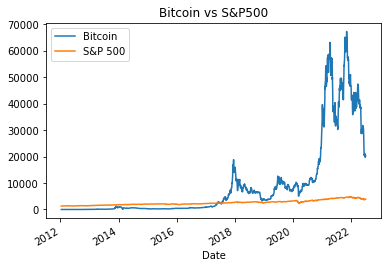

In [34]:
# this is the price plot between bitcoin and s&p 500
bitcoin_sp500.plot(title="Bitcoin vs S&P500")

<AxesSubplot:xlabel='Date'>

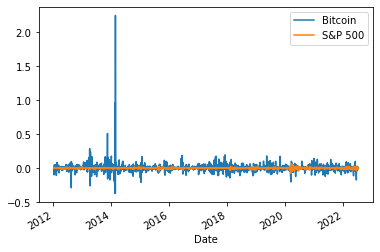

In [35]:
# plot the pct_change of bitcoin and s&p on the same graph
bitcoin_sp500.pct_change().plot()

In [36]:
#calculate cumlative returns of bitcoin and s&p500
cumulative_returns = (1 + bitcoin_sp500.pct_change()).cumprod() - 1
cumulative_returns.tail()

,Bitcoin,S&P 500
Date,,
2022-06-29,2987.362963,1.955078
2022-06-30,2920.322222,1.925989
2022-07-01,2923.266667,1.937442
2022-07-05,2978.211111,1.939376
2022-07-06,3005.729630,1.970144


<AxesSubplot:xlabel='Bitcoin', ylabel='S&P 500'>

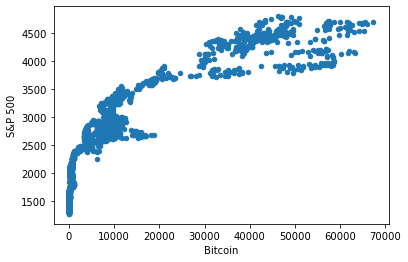

In [37]:
#create a scatter plot of the two to visulaize the correlation
bitcoin_sp500.plot(kind='scatter', x='Bitcoin', y='S&P 500')

In [38]:
# calculate the correlation of bitcoin and s&p500
bitcoin_sp500.corr()

,Bitcoin,S&P 500
Bitcoin,1.000000,0.883682
S&P 500,0.883682,1.000000


In [39]:
# create variable that is the daily_returns of both and then calculate the standard deviation of the daily returns
daily_returns_both = bitcoin_sp500.pct_change().dropna()
daily_returns_both.std()

Bitcoin    0.065156
S&P 500    0.007825
dtype: float64

In [40]:
#calculate covariance
covariance = daily_returns_both['Bitcoin'].cov(daily_returns_both['S&P 500'])
covariance

4.0485977870235127e-05

In [41]:
#calculate rolling variance
rolling_variance = daily_returns_both['S&P 500'].rolling(window=90).var()

In [42]:
#calculate variance 
variance_sp500 = daily_returns_both['S&P 500'].var()
variance_sp500

6.12264622195262e-05

In [43]:
#calculate beta

bitcoin_beta = covariance/variance_sp500
bitcoin_beta

0.6612496688943662

In [44]:
#calculate rolling 90 day covariance
rolling_covariance_bitcoin = daily_returns_both['Bitcoin'].rolling(window=90).cov(daily_returns_both['S&P 500'])

In [49]:
#calculate rolling 90 day beta
rolling_beta = rolling_covariance_bitcoin/rolling_variance

#rolling_beta.plot(figsize= (18,11), title = "Rolling 90 Day Beta of Bitcoin")

In [51]:
#create new column in bitcoin df for beta so we can plot this later
bitcoin['beta'] = .661249
#bitcoin

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


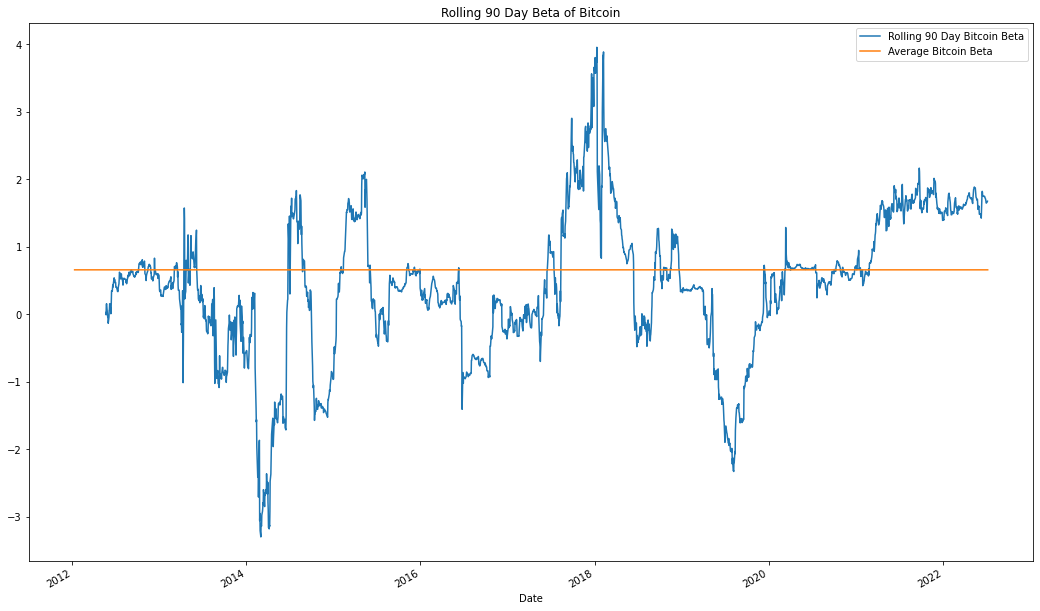

In [53]:
#plot rolling 90 day beta of bitcoin vs average beta of bitcoin

ax = rolling_beta.plot(figsize= (18,11), title = "Rolling 90 Day Beta of Bitcoin")

bitcoin['beta'].plot(ax=ax)
ax.legend(['Rolling 90 Day Bitcoin Beta','Average Bitcoin Beta'])

In [ ]:
#plot rolling standard deviation
#daily_returns_both.rolling(window=30).std().plot(figsize=(20,12))

In [ ]:
#plot correlation
#daily_returns_both.rolling(window=60).corr().plot(figsize=(20,12))

In [56]:
#seperate the daily change of each into seperate dataframes so we can manipulate them seperatly
sp500_daily_change = sp500_one.pct_change().dropna()
bitcoin_daily_change = bitcoin_one.pct_change().dropna()
#display(bitcoin_daily_change)
#display(sp500_daily_change)


In [60]:
#plot bitcoin price vs the yearly moving average
#ax = bitcoin_one.plot(figsize=(20,12), title = 'Yearly Moving Average vs. Price')
#bitcoin_one.rolling(window=365).mean().plot(ax=ax)
#ax.legend(['Bitcoin Price','365 Day Moving Average'])

In [62]:
# calculate the rolling 30 day covariance of bitcoin
#rolling_covariance = daily_returns_both['Bitcoin'].rolling(window=30).cov(daily_returns_both['S&P 500'])
#rolling_covariance =rolling_covariance.dropna()
#rolling_covariance.plot()


In [ ]:
#calculate the rolling 30 day variance
#rolling_variance = daily_returns_both['S&P 500'].rolling(window=30).var()
#rolling_variance = rolling_variance.dropna()

In [ ]:
#calculate the 30 day rolling beta of bitcoin
#rolling30_beta_bitcoin = rolling_covariance/rolling_variance
#rolling30_beta_bitcoin.plot(figsize=(20,12))

In [68]:
# calculate rolling sharpe ratio of bitcoin
average_annual_return_bitcoin_rolling = bitcoin_daily_change.rolling(window=365).mean()*365

average_annual_return_bitcoin_rolling = average_annual_return_bitcoin_rolling.dropna()

average_annual_std_bitcoin_rolling = bitcoin_daily_change.rolling(window=365).std() * np.sqrt(365)
average_annual_std_bitcoin_rolling = average_annual_std_bitcoin_rolling.dropna()

#create new column in bitcoin named sharpe so that we can plot this in the next cell
bitcoin['sharpe'] = 1.13
#average_annual_std_bitcoin_rolling

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


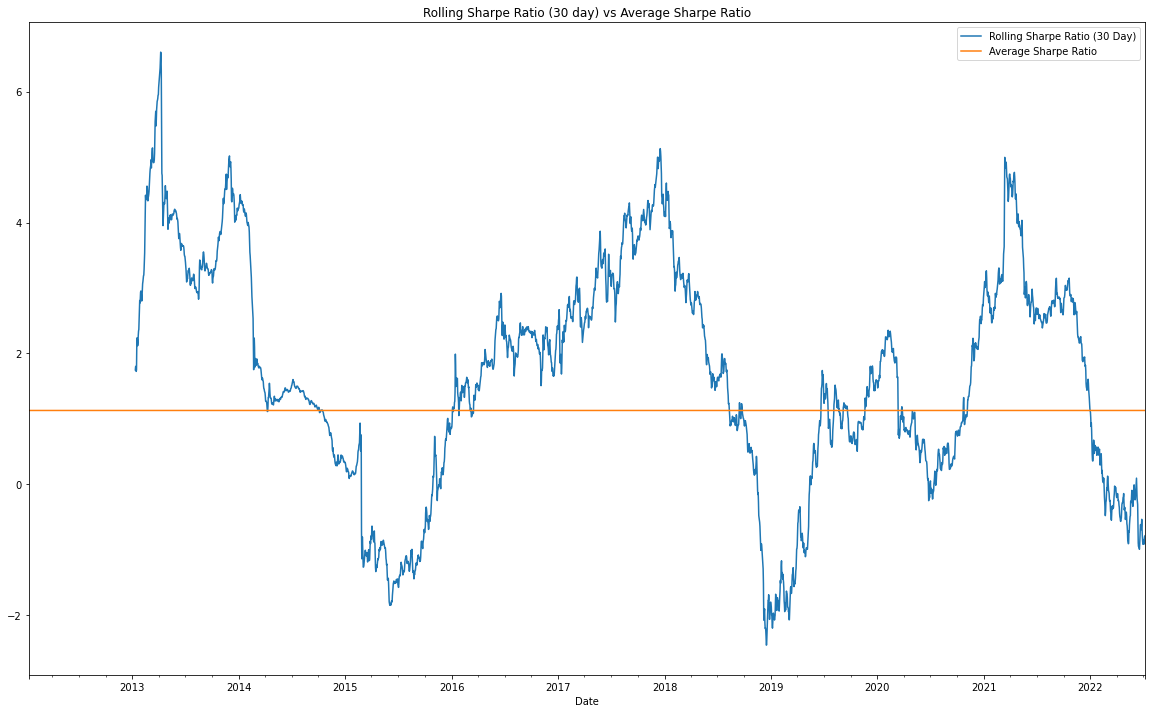

In [72]:
#plot the rolling sharpe ratio vs average sharpe ratio
rolling_sharpe_ratio = average_annual_return_bitcoin_rolling/average_annual_std_bitcoin_rolling
ax = rolling_sharpe_ratio.plot(figsize=(20,12), title = "Rolling Sharpe Ratio (30 day) vs Average Sharpe Ratio")
bitcoin['sharpe'].plot(ax=ax)
ax.legend(['Rolling Sharpe Ratio (30 Day)','Average Sharpe Ratio'])


In [73]:
#add sharpe column to s&P 500 so we can plot it in the later
sp500['sharpe'] = .90
#sp500

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# calculate rolling sharpe ratio of s&p
average_annual_return_sp500_rolling = sp500_daily_change.rolling(window=365).mean()*251

average_annual_return_sp500_rolling = average_annual_return_sp500_rolling.dropna()

average_annual_std_sp500_rolling = sp500_daily_change.rolling(window=365).std() * np.sqrt(365)
average_annual_std_sp500_rolling = average_annual_std_sp500_rolling.dropna()

average_annual_std_sp500_rolling

rolling_sharpe_ratio_sp500 = average_annual_return_sp500_rolling/average_annual_std_sp500_rolling

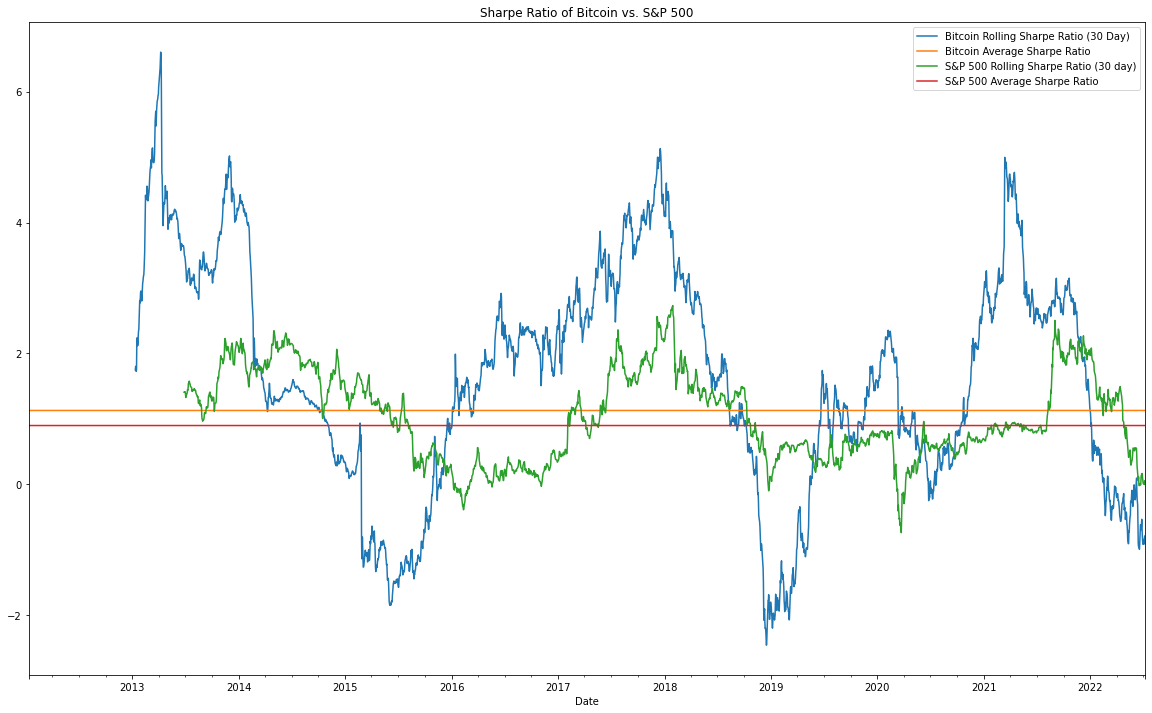

In [76]:
#plot the rolling sharpe ratio of bitcoin vs s&p 500 - include the average sharpe ratio is there as well
ax = rolling_sharpe_ratio.plot(figsize=(20,12), title= "Sharpe Ratio of Bitcoin vs. S&P 500")
bitcoin['sharpe'].plot(ax=ax)
rolling_sharpe_ratio_sp500.plot(ax=ax)
sp500['sharpe'].plot(ax=ax)
ax.legend(['Bitcoin Rolling Sharpe Ratio (30 Day)','Bitcoin Average Sharpe Ratio','S&P 500 Rolling Sharpe Ratio (30 day)', 'S&P 500 Average Sharpe Ratio'])